In [1]:
import clip
from fastai.vision.all import *

import pandas as pd

import glob
import newlinejson

from helper import *

In [49]:
# setting path variables 
Path.BASE_PATH = Path('../../MelvinWevers#9512/train')
Path.BASE_PATH.ls()
path = Path.BASE_PATH

In [19]:
data = get_dls(128, 224, augment=False)
classes = data.vocab

NameError: name 'path' is not defined

In [16]:
test_img = '../../MelvinWevers#9512/sample_images/HisVis2/NL-HlmNHA_1478_00075K00/NL-HlmNHA_1478_00075K00_08.jpg'

## Make predictions with Fine-Tuned Places-365 Model

In [14]:
learner = load_learner('./models/DeBoer_places.pkl')

In [17]:
label, y, output = learner.predict(test_img)

/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [18]:
probs, preds = output.topk(5)
output_ = {}

top_classes = [classes[i] for i in preds]
top5 = list(probs)
result = pd.DataFrame({'p': probs}, index=top_classes)

NameError: name 'classes' is not defined

In [54]:
for index, class_ in enumerate(preds):
    output_[classes[class_]] = round(float(probs[index]),4)

In [55]:
output_

{'standbeeld': 0.9517,
 'bouwplaats': 0.0213,
 'kunstwerk': 0.0074,
 'brand': 0.0043,
 'vijver_plas': 0.0026}

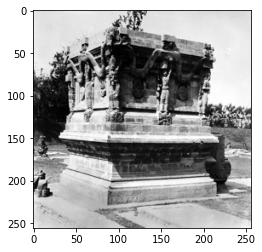

In [57]:
img = Image.open(test_img)
img = img.resize((256, 256))

plt.imshow(img, cmap='gray')



In [69]:
samples_imgs = glob.glob('../../MelvinWevers#9512/wereldculturen/data/*.jpg')

In [ ]:
df = pd.read_csv('../data/20210705_random_images_metadata.csv')

In [64]:
def make_prediction(path, topk=5):
    output_ = {}
    label, y, output = learner.predict(path)
    probs, preds = output.topk(5)
    for index, class_ in enumerate(preds):
        output_[classes[class_]] = round(float(probs[index]),4)
    return output_

## Make Prediction with CLIP-Linear Probe

In [11]:
# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

In [7]:
# load the model from disk
filename = 'linear_probe_model.sav'
CLIP_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
# print(result)

In [78]:
results = list()

In [81]:
for img in samples_imgs:
    d = dict()
    filename = os.path.basename(img)
    #d['uuid'] = df[df['file_name'] == filename]['uuid'].values[0]
    d['filename'] = filename
    d['predictions'] = make_prediction(img)
    results.append(d)

In [83]:
with open('./results_testMarjolijn.json', "w") as f:
        newlinejson.dump(results, f)